In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [28]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
X_train.shape

(60000, 28, 28)

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

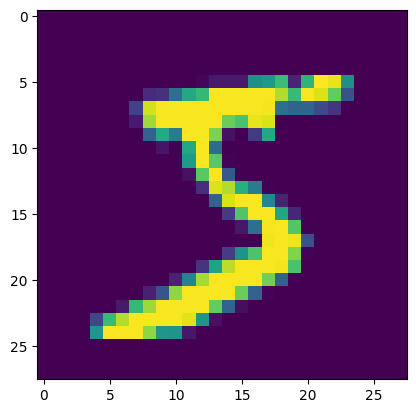

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [32]:
X_train = X_train/255
X_test = X_test/255

In [33]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10, activation="softmax"))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2731 - accuracy: 0.9210 - val_loss: 0.1487 - val_accuracy: 0.9552
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1177 - accuracy: 0.9647 - val_loss: 0.1135 - val_accuracy: 0.9666
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0812 - accuracy: 0.9763 - val_loss: 0.1062 - val_accuracy: 0.9702
Epoch 4/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0626 - accuracy: 0.9809 - val_loss: 0.0924 - val_accuracy: 0.9723
Epoch 5/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0987 - val_accuracy: 0.9726
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0965 - val_accuracy: 0.9728
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0998 - val_accuracy:

In [38]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [39]:
y_pred = y_prob.argmax(axis=1)

In [40]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.9758

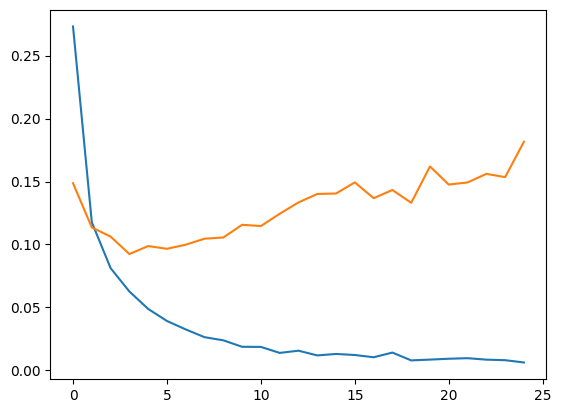

In [43]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

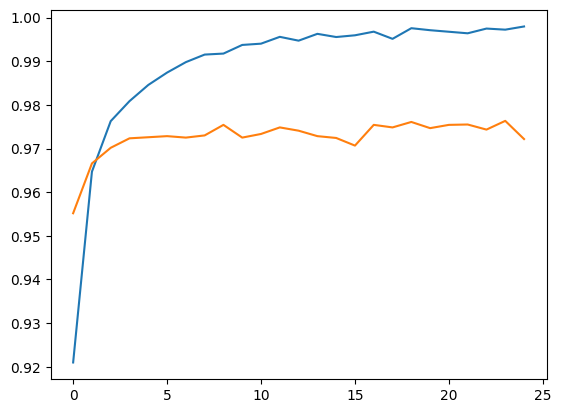

In [44]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])